In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

In [54]:
points = [0, 3, 6, 9]

In [55]:
x_s = []
part_size = 100


for i in points:
    x = sps.uniform.rvs(i, 3, part_size)
    x_s.append(x)

f1 = lambda x: x
f2 = lambda x: 6 - x
f3 = lambda x: x - 6
f4 = lambda x: 12 - x
f_s = [f1, f2, f3, f4]

y_s = []

for x, f in zip(x_s, f_s):
    y_s.append(f(x) + sps.uniform.rvs(size=len(x)))
    
x_s = np.array(x_s).ravel()
y_s = np.array(y_s).ravel()

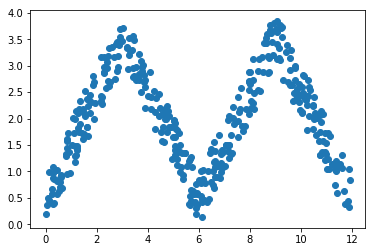

In [56]:
df = pd.DataFrame()
df['x'] = x_s
df['y'] = y_s
df = df.sort_values(by=['x'])
plt.scatter(df['x'], df['y'])

In [60]:
from sklearn.linear_model import LinearRegression

f_s = []
for i in points:
    x = df['x']
    y = df['y']
    mask = np.logical_and(x >= i, x <= i + 3) 
    x = pd.DataFrame(x[mask])
    y = y[mask]
    f_s.append(LinearRegression().fit(x, y))

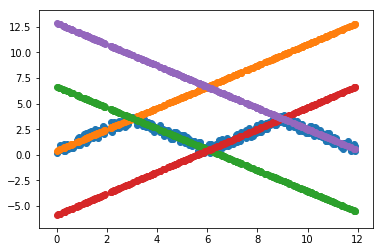

In [63]:
plt.scatter(df['x'], df['y'])
predictions = []

for f in f_s:
    predictions.append(f.predict(df[['x']]))
    plt.scatter(df['x'], predictions[-1])

In [67]:
differences = [df['y'] - prediction for prediction in predictions]

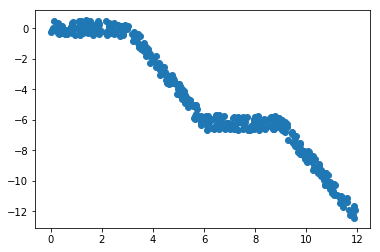

In [73]:
difference = differences[0]
plt.scatter(df['x'], difference)

In [77]:
sigmas = [np.mean(difference ** 2) for difference in differences]
sigmas

[34.14262139382823, 15.566067862502466, 15.621490311765433, 36.1927185839487]

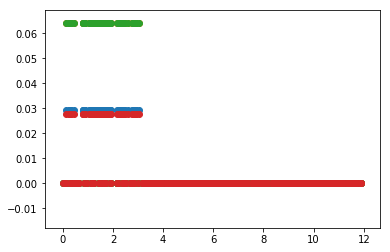

In [82]:
densities = [sps.uniform.pdf(difference, scale=sigma) for sigma in sigmas]

#plt.scatter(df['x'], df['y'])
for difference in differences:
    plt.scatter(df['x'], densi)